# A simulation of population 
## Simulation of a pedigree
This is a very simple simulation.  Only two parameters are required:
- $N_{\text{ID}}$ of each generration
- $N_{\text{generations}}$

The function will sample half of the ID in each generation as sires, and the rest as dams.  Each pair will have two offspring.

**Note:**
- The founder generation is deemed as generation **0**

In [1]:
# if PlayGround is not installed, run below
# using Pkg
# Pkg.add("https://github.com/xijiang/PlayGround.jl")
# or,
# ]
# add https://github.com/xijiang/PlayGround.jl
import PlayGround: simu_u_ped, simu_bv_p

nid, ngn = 10, 2
ped = simu_u_ped(nid, ngn)


Simulate a pedigree of nid x ng = (10 x 2)
--------------------------------------------
 ... Done


30-element Array{PlayGround.PM,1}:
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(8, 6)
 PlayGround.PM(8, 6)
 PlayGround.PM(5, 7)
 ⋮
 PlayGround.PM(2, 1)
 PlayGround.PM(2, 1)
 PlayGround.PM(18, 15)
 PlayGround.PM(18, 15)
 PlayGround.PM(19, 20)
 PlayGround.PM(19, 20)
 PlayGround.PM(13, 16)
 PlayGround.PM(13, 16)
 PlayGround.PM(17, 14)
 PlayGround.PM(17, 14)
 PlayGround.PM(11, 12)
 PlayGround.PM(11, 12)

## Breeding value and phenotype simulation with pedigree only
### Parameter required:
- $h^2 \in [0, 1]$
- $V_p \in (0, \infty)$
- Pedigree, e.g., see above
- $\mu$, by default, 0.0

### The model and algorithm used for breeding value and phenotype
The phenotype $P = A_s + M_s + A_d + M_d + E$, where $A$ is for additive effect, $M$ is for Medelian sampling error, $_s$ for sire and $_d$ for dam.

$E \sim N(0, V_p(1-h^2)$
$A_p \sim N(0, V_ph^2/2)$ 

For each offspring, when its parent $_p$, either sire or dam, is known, then $A_p/2 + M_p$ are added to the offspring's breeding value. 

In [2]:
h2, vp = 0.8, 1.
bv, y = simu_bv_p(h2, vp, ped)
# simu_bv_p(h2, vp, ped, μ = 3.) # if to simulate a non-zero μ


Simulate breeding and phenotype values with h2 = 0.8, vp = 1.0
----------------------------------------------------------------
 ... Done


([-1.5211493307834303, -0.7570420189645739, 0.3061748567118644, -1.1319008908007904, -1.1327230479483723, -0.4224017669142917, -1.8914456721155184, 0.2944521961234201, 0.8384086470118428, -0.4480078750710448  …  0.16444015530217004, -0.10096643162226132, 0.1258922711085596, -1.3409732498335023, -1.9835561821909775, -1.1255646094332965, -1.6987286460059798, -0.861312300945764, 0.12174266630790459, -0.5674302987891535], [-1.240399418297581, -0.27394880840717645, -0.2583358780922692, -0.8494011392842877, -1.472935690669833, -0.3393905698122325, -2.796025737063101, 0.493690439315457, 1.8688388058463048, -0.47188648169611463  …  1.1162104066626621, -0.5641909151730502, 0.1822106845079895, -1.6339728156520694, -2.0438474928452295, -1.137612149166995, -1.8160836126313817, -0.6830663037824485, -0.5492291633010944, -0.3235716602407227])

### Some quick properties of such propulations
#### Realized parameters
If we take a large $N_{\text{ID}}$, then the estimates should be very close to the parameters we set.

In [4]:
using Statistics
nid, ngn, h2, vp = 1000, 1, 0.8, 1.
ped = simu_u_ped(nid, ngn)
bv, y = simu_bv_p(h2, vp, ped)
# Variances in generation 0
vt0 = var(bv[1:nid])
vy0 = var(y[1:nid])
println(join([vt0, vy0, vt0/vy0], '\n'))


Simulate a pedigree of nid x ng = (1000 x 1)
----------------------------------------------
 ... Done

Simulate breeding and phenotype values with h2 = 0.8, vp = 1.0
----------------------------------------------------------------
 ... Done
0.8338403155758016
1.005848857977344
0.8289916610857089


We can see that the realized parameters $V_p\approx 1.01$, $h2\approx 0.83$ are close to 1.0, and 0.8.  These result are not bad.

#### Is there a trend in the $V_p$ and $h^2$ across generations.
Let's simulate 100 generations. Three scenarios of $N_{\text{ID}}$ = [1000, 50, 10] are simulated below.


Simulate a pedigree of nid x ng = (1000 x 100)
------------------------------------------------
 ... Done

Simulate breeding and phenotype values with h2 = 0.8, vp = 1.0
----------------------------------------------------------------
 ... Done


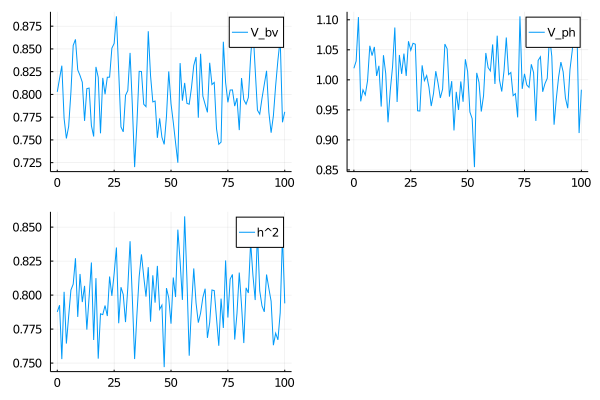

In [11]:
using Plots
nid, ngn, h2, vp = 1000, 100, 0.8, 1.
ped = simu_u_ped(nid, ngn)
bv, y = simu_bv_p(h2, vp, ped)
vb = Float64[]
vy = Float64[]
for g in 0:ngn
    start = g * nid
    push!(vb, var(bv[start+1:start+nid]))
    push!(vy, var(y[start+1:start+nid]))
end
eh2 =  vb./vy

gbv = plot(0:ngn, vb, label="V_bv")
gph = plot(0:ngn, vy, label="V_ph")
gh2 = plot(0:ngn, eh2, label="h^2")
plot(gbv, gph, gh2)


Simulate a pedigree of nid x ng = (50 x 100)
----------------------------------------------
 ... Done

Simulate breeding and phenotype values with h2 = 0.8, vp = 1.0
----------------------------------------------------------------
 ... Done


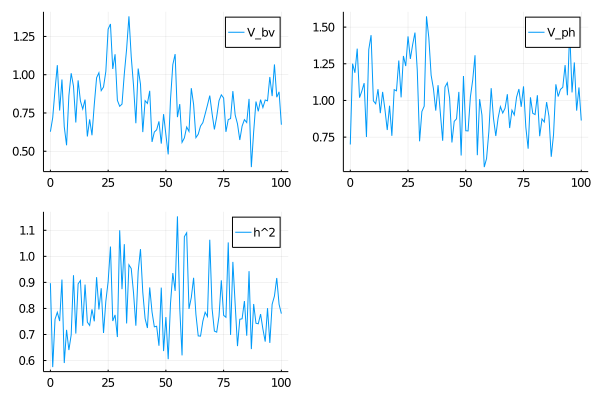

In [9]:
nid, ngn, h2, vp = 50, 100, 0.8, 1.
ped = simu_u_ped(nid, ngn)
bv, y = simu_bv_p(h2, vp, ped)
vb = Float64[]
vy = Float64[]
for g in 0:ngn
    start = g * nid
    push!(vb, var(bv[start+1:start+nid]))
    push!(vy, var(y[start+1:start+nid]))
end
eh2 =  vb./vy

gbv = plot(0:ngn, vb, label="V_bv")
gph = plot(0:ngn, vy, label="V_ph")
gh2 = plot(0:ngn, eh2, label="h^2")
plot(gbv, gph, gh2)


Simulate a pedigree of nid x ng = (10 x 100)
----------------------------------------------
 ... Done

Simulate breeding and phenotype values with h2 = 0.8, vp = 1.0
----------------------------------------------------------------
 ... Done


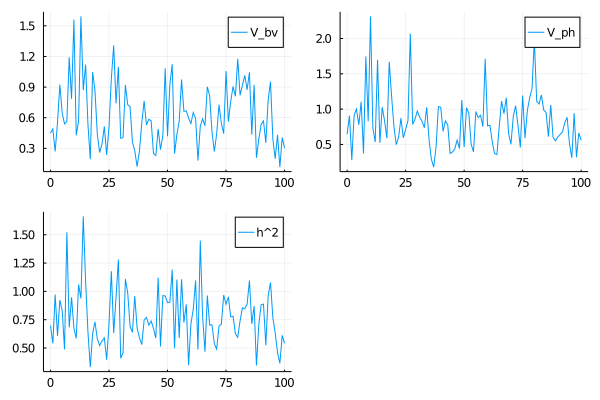

In [12]:
nid, ngn, h2, vp = 10, 100, 0.8, 1.
ped = simu_u_ped(nid, ngn)
bv, y = simu_bv_p(h2, vp, ped)
vb = Float64[]
vy = Float64[]
for g in 0:ngn
    start = g * nid
    push!(vb, var(bv[start+1:start+nid]))
    push!(vy, var(y[start+1:start+nid]))
end
eh2 =  vb./vy

gbv = plot(0:ngn, vb, label="V_bv")
gph = plot(0:ngn, vy, label="V_ph")
gh2 = plot(0:ngn, eh2, label="h^2")
plot(gbv, gph, gh2)

## Simulation BV+P with QTL and a pedigree
The above simulation assumes a constant Mendelian sampling error, which is not the case, especially when the population size of each generation is small.  To simulate with QTL can avoid such problem.

### The algorithm
#### Genotype simulation
1. Simulate a pedigree as above
   - Assume each ID has two offspring
   - Random mating for the ID
2. QTL allele frequencies
   - Typically, the frequencies follow a U-shaped distribution
   - Many univariate distributions have a U-shape, for example
     - Arcsine distribution, $f(x) = \frac{1}{\pi\sqrt{x(1-x))}}$
     - Beta distribution, e.g., $\beta(0.5, 0.5)$
   - I sample allele frequencies for generation 0 from $\beta(0.7, 0.7)$, with MAF = 0.01.
3. Generation 1 and on will have alleles dropped from generation 0 and through.

#### Breeding and phenotype values
1. QTL effect $e_{\text{QTL}}\stackrel{iid}{\sim}N(0, \frac{V_g}{N_{\text{QTL}}})$, which can also be adjusted.
2. $\text{BV}_i = G_i'e_{\text{QTL}}$.

#### Other considerations
1. LD should be considered in the future.
2. There are a lot of factors, but different scenarios may result in similar populations.

## Variance component estimation
The breeding values can't be observed in reality.  They have to be estimated.  Hence the variances of breeding values and errors have to be estimated.

Below is an estimation procedure using Echidna.  This software is an ASReml equivalent.  One can also use it for commercial analysis if (s)he has a license for ASReml.